In [10]:
import numpy as np
import pandas as pd
import networkx as nx

from collections import Counter
from matplotlib import pyplot as plt

# Load Data

In [2]:
luquilloTree = pd.read_csv("data\ForestGeo\sample\luquillo_tree6_1h.csv")
luquilloTreeX = luquilloTree.sort_values(['gx','gy']);
luquilloTreeY = luquilloTree.sort_values(['gy','gx']);

In [4]:
def distance_weight(x1,y1,x2,y2):
    return 1/(1 + ( (x1-x2)**2 + (y1-y2)**2 )**0.5 )

In [5]:
kernal = 10
G = nx.empty_graph()
for index,row in luquilloTree.iterrows():
    gx = row["gx"]
    gy = row["gy"] 
    neighbors = luquilloTree[(luquilloTree['gx'] < (gx + kernal) ) & (luquilloTree['gx'] > (gx- kernal))
                            & (luquilloTree['gy'] < (gy + kernal) ) & (luquilloTree['gy'] > (gy- kernal))]
    G.add_weighted_edges_from([(row['treeID'], 
                                neighbor['treeID'], 
                                distance_weight(row['gx'],row['gy'],neighbor['gx'],neighbor['gy'])
                                ) for i,neighbor in neighbors.iterrows()])
    G.nodes[row['treeID']]["sp"] =row['sp']
    G.nodes[row['treeID']]["DFstatus"] =row['DFstatus']

In [15]:
nx.write_gpickle(G,"networks\ForestGeoSample20210423.pickle")

In [16]:
G = nx.read_gpickle("networks\ForestGeoSample20210423.pickle")

In [9]:
G.number_of_edges()
G.number_of_nodes()

8010

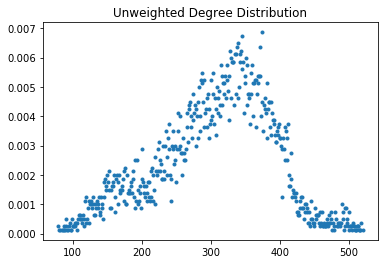

In [14]:
degreeC= Counter(dict(G.degree()).values())
plt.plot(list(degreeC.keys()),[i/sum(degreeC.values()) for i in degreeC.values()],'.');
plt.title("Unweighted Degree Distribution");